# 로지스틱 회귀분석

로지스틱(Logistic) 회귀분석은 그 명칭과 달리 회귀분석 문제와 분류 문제 모두에 사용할 수 있다. 로지스틱 회귀 모형에서는 종속변수가 이항 분포를 따르고 그 모수(parameter) $\theta$가 독립 변수 $x$에 의존한다고 가정한다.

$$ p(y \mid x) = \text{Bin} (y \mid N, \theta(x) )$$

식에서 보듯이 로지스틱 함수는 y의 값이 특정한 구간내의 값($0 \sim N$)만 가질 수 있기 때문에 종속변수가 이러한 특성을 가진 경우에 회귀분석 망법으로 쓸 수 있다.  

또는 이항 분포의 특별한 경우로서 베르누이 확률 변수도 가능하다.

$$ p(y \mid x) = \text{Ber} (y \mid  \theta(x) )$$

이 경우에는 종속변수가 0 또는 1만 가능하므로 분류 문제에도 적용할 수 있다.

-무한대< y <f(x) :선형회귀 
0< y <1: 로지스틱 
세타:y가 나올확률 (예: 나이에 따라서 시험에 붙을 확률) 
로지스틱 회귀 vs. 베르누이 차이점 ( 베르누이는 x에 대해 모수 구함, 로지스틱은y에 대해 모수 구함- 시그모이드 함수를 사용 ) 

## 시그모이드 함수

모수 $\theta$ 는 x의 함수이다. 함수의 형태는 x의 선형 함수를 기반으로 0부터 1사이의 값만 나올 수 있도록 시그모이드 함수라는 것을 사용하여 변형되었다.

$$
\theta = f(w^Tx)
$$


모수 $\theta$는 일반적인 회귀분석의 종속 변수와 달리 0 부터 1까지의 실수값만 가질 수 있기 때문에 시그모이드 함수(sigmoid function)이라 불리는 특별한 형태의 함수 $f$를 사용해야 한다. 시그모이드 함수는 종속 변수의 모든 실수 값에 대해 유한한 구간 $(a,b)$ 사이의 한정된(bounded) 값과 양의 기울기를 가지는 함수를 말하며 다음과 같은 함수들이 주로 사용된다.

 * 로지스틱 함수 (Logistic Function) 
 
$$ \text{logitstic}(z) = \dfrac{1}{1+\exp{(-z)}} $$
 
 * 오차 함수 (Error Function) 
 
$$ \text{erf}(z) = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,dt $$
 
 * 하이퍼볼릭 탄젠트 함수 (Hyperbolic tangent) 
 
$$ \tanh(z) = \frac{\sinh z}{\cosh z} = \frac {e^z - e^{-z}} {e^z + e^{-z}} $$

두번 함수에 넣어서 결국 0.1 regression 으로 만듬, x 변수를 넣어서 결국 W 를 얻어내는것 

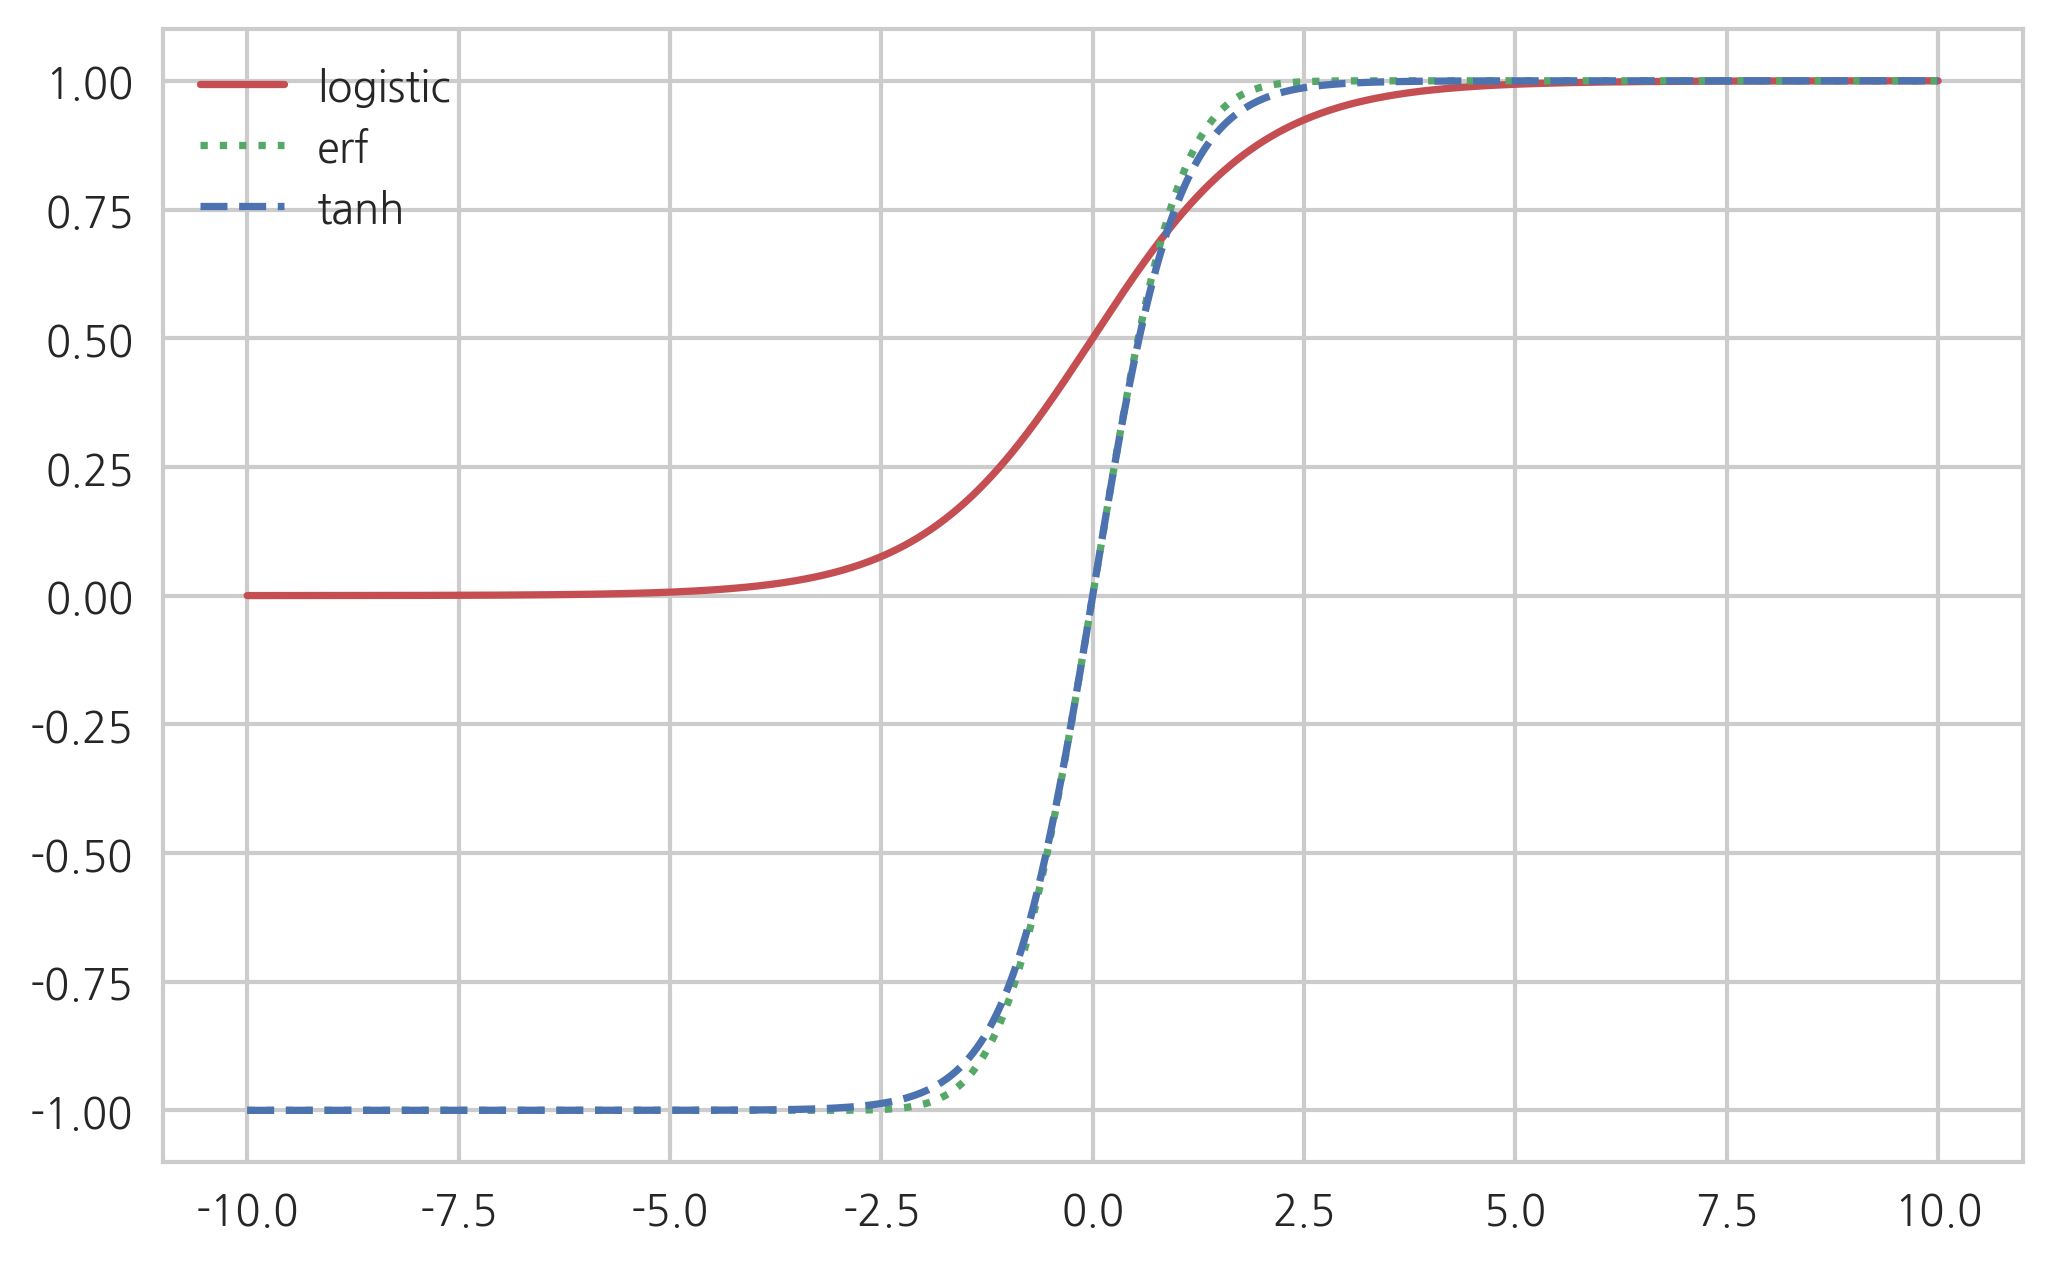

In [7]:
xx = np.linspace(-10, 10, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="logistic")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="erf")
plt.plot(xx, np.tanh(xx), 'b--', label="tanh")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.show()

## 로지스틱 함수

여러가지 시그모이드 중 로지스틱 함수는 다음과 같은 물리적인 의미를 부여할 수 있기 때문에 많이 사용된다.

우선 Bernoulli 시도에서 1이 나올 확률 $\theta$ 과 0이 나올 확률 $1-\theta$ 의 비(ratio)는 다음과 같은 수식이 되며 이를 odds ratio 라고 한다.

$$ \text{odds ratio} = \dfrac{\theta}{1-\theta} $$

이 odds ratio 를 로그 변환한 것이 로지트 함수(Logit function)이다.

$$ z = \text{logit}(\text{odds ratio}) = \log \left(\dfrac{\theta}{1-\theta}\right) $$ 

로지스틱 함수(Logistic function) 는 이 로지트 함수의 역함수이다.

$$ \text{logitstic}(z) = \theta(z) = \dfrac{1}{1+\exp{(-z)}} $$  

세타는 0에서 무한대의 값을 가질수가 있어서 1-세타로 비율을 구해준다


## 로지스틱 모형의 모수 추정

로지스틱 모형은 일종의 비선형 회귀 모형이지만 다음과 같이 MLE(Maximum Likelihood Estimation) 방법으로 모수 $w$를 추정할 수 있다.

여기에서는 종속 변수 $y$가 베르누이 확률 변수라고 가정한다.

$$ p(y \mid x) = \text{Ber} (y \mid  \theta(x;w) )$$

$\theta$가 로지스틱 함수 형태로 표현된다면

$$
\theta(x;w) = \dfrac{1}{1 + \exp{(-w^Tx)}}
$$

데이터 표본이 $\{ x_i, y_i \}_{1:N}$일 경우 Log Likelihood $\text{LL}$ 를 구하면 다음과 같다.

$$
\begin{eqnarray}
\text{LL} 
&=& \log \prod_{i=1}^N \theta_i(x_i;w)^{y_i} (1-\theta_i(x_i;w))^{1-y_i} \\
&=& \sum_{i=1}^N \left( y_i \log\theta_i(x_i;w) +  (1-y_i)\log(1-\theta_i(x_i;w)) \right) \\
\end{eqnarray}
$$

가 되고 이를  Log Likelihood 에 적용하면 다음과 같다.

$$
\begin{eqnarray}
\text{LL} 
&=& \sum_{i=1}^N \left( y_i \log\theta_i(x_i;w) +  (1-y_i)\log(1-\theta_i(x_i;w)) \right) \\
&=& \sum_{i=1}^N \left( y_i \log\left(\dfrac{1}{1 + \exp{(-w^Tx_i)}}\right) - (1-y_i)\log\left(\dfrac{\exp{(-w^Tx_i)}}{1 + \exp{(-w^Tx_i)}}\right) \right) \\
\end{eqnarray}
$$



이 값의 최대화하는 값을 구하기 위해 chain rule를 사용하여 $w$로 미분해야 한다.

우선 $\theta$를 $w$로 미분하면

$$ \dfrac{\partial \theta}{\partial w} 
= \dfrac{\partial}{\partial w} \dfrac{1}{1 + \exp{(-w^Tx)}} \ 
= \dfrac{\exp{(-w^Tx)}}{(1 + \exp{(-w^Tx)})^2} x \ 
= \theta(1-\theta) x $$


chain rule를 적용하면 

$$ 
\begin{eqnarray}
\dfrac{\partial \text{LL}}{\partial w} 
&=& \sum_{i=1}^N \left( y_i \dfrac{1}{\theta_i(x_i;w)} - (1-y_i)\dfrac{1}{1-\theta_i(x_i;w)} \right) \dfrac{\partial \theta}{\partial w}  \\
&=& \sum_{i=1}^N \big( y_i (1-\theta_i(x_i;w)) - (1-y_i)\theta_i(x_i;w)  \big)  x_i \\
&=& \sum_{i=1}^N \big( y_i  - \theta_i(x_i;w) \big) x_i \\
\end{eqnarray}
$$

이 값은 $w$에 대한 비선형 함수이므로 선형 모형과 같이 간단하게 그레디언트가 0이 되는 모수 $w$ 값에 대한 수식을 구할 수 없으며 수치적인 최적화 방법(numerical optimization)을 통해 최적 모수 $w$의 값을 구해야 한다.

## 수치적 최적화

단순한 Steepest Gradient 방법을 사용한다면 최적화 알고리즘은 다음과 같다.

그레디언트 벡터는
$$
g_k = \dfrac{d}{dw}(-LL)
$$

이 방향으로 step size $\eta_k$ 만큼 움직이면 다음과 같이 반복적으로 최적 모수값을 구할 수 있다.

$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} - \eta_k g_k \\
&=& w_{k} + \eta_k \sum_{i=1}^N \big( y_i  - \theta_i(x_i; w_k) \big) x_i\\
\end{eqnarray}
$$


여기서 W를 구하는것은 불가능하므로 수치적 최적화를 통해 찾아낸다 (Steepest Gradient)

세타= Y^ (세타는 y 가 들어갔을때 나올 확률이다, 즉 예측치이다)
y-세타는 y-y^ 이므로 잔차와 같다 
그레디언트 벡터는 y가 최소화가 되는 곳을 찾는것이 아니라 최대화 되는곳을 찾으므로 -LL이다

## 로지스틱 회귀의 계수 검정

로지스틱 회귀분석 계수에 대해 계수값이 0인 경우를 귀무가설로 하는 Wald 검정을 할 수 있다.

$$ H_0: w_k = 0 $$

## 성능 측정

로지스틱 회귀 성능은 pseudo R square로 측정한다.

$$ R^2_{\text{pseudo}} = 1 - \dfrac{G^2}{G^2_0} $$

$G^2$는 deviance 라고 하는 양으로 다음과 같이 정의된다.

$$ G^2 = 2\sum_{i=1}^N \left( y_i\log\dfrac{y_i}{\hat{y}_i} + (1-y_i)\log\dfrac{1-y_i}{1-\hat{y}_i} \right) $$

여기에서 $\hat{y}$는 다음과 같다.

$$ \hat{y}_i = \theta(x_i) $$

$G^2$는 현재 deviance, $G^2_0$는 모든 계수가 0인 null 모형으로 측정한 deviance이다.

내가 만든 모델이 perfect 하면 G-sqaure는 1이 된다 (y^이 0이 되므로 )

## StatsModels 패키지의 로지스틱 회귀

StatsModels 패키지는 베르누이 분포를 따르는 로지스틱 회귀 모형 `Logit` 를 제공한다. 사용방법은 `OLS` 와 동일하다. 

In [2]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


In [4]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, 
                            n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

In [5]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
## 리니어  방정식과 달리 (역행렬을 구해서 W구할수 있음), 그러나 logit 에서는 역행렬이 안나와서 steepest gradient로 w 구함
print(logit_res.summary())
## LL-null: 독립변수 하나도 안썻을때 최대화된 LL 
## LLR p-value: prob(f-statistic)과비슷,카이스퀘어 분포와 비슷
## z: odds ratio와 거의 같음 , x1 가 1만큼 커질때 y가 4.699만큼 커짐 
## 의사-결정계수(Pseudo-R**2):R2은 결정계수라 불리는데, 종속변수의 분산 중 어느 정도 비율(%)이 독립변수에 의해 설명되는가를 나타내는 값으로 0.00 ~ 1.00 사이의 값을 갖는다. 1.00에 가까운 값이 나올수록 완벽한 관계에 가까워지는 것을 의미하고, 선형 회귀에서의 다중 상관계수의 제곱과 거의 유사한 지표이다. 이는 모델의 적합도를 평가하는데 쓰인다.

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 26 Oct 2017   Pseudo R-squ.:                  0.7679
Time:                        18:49:27   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


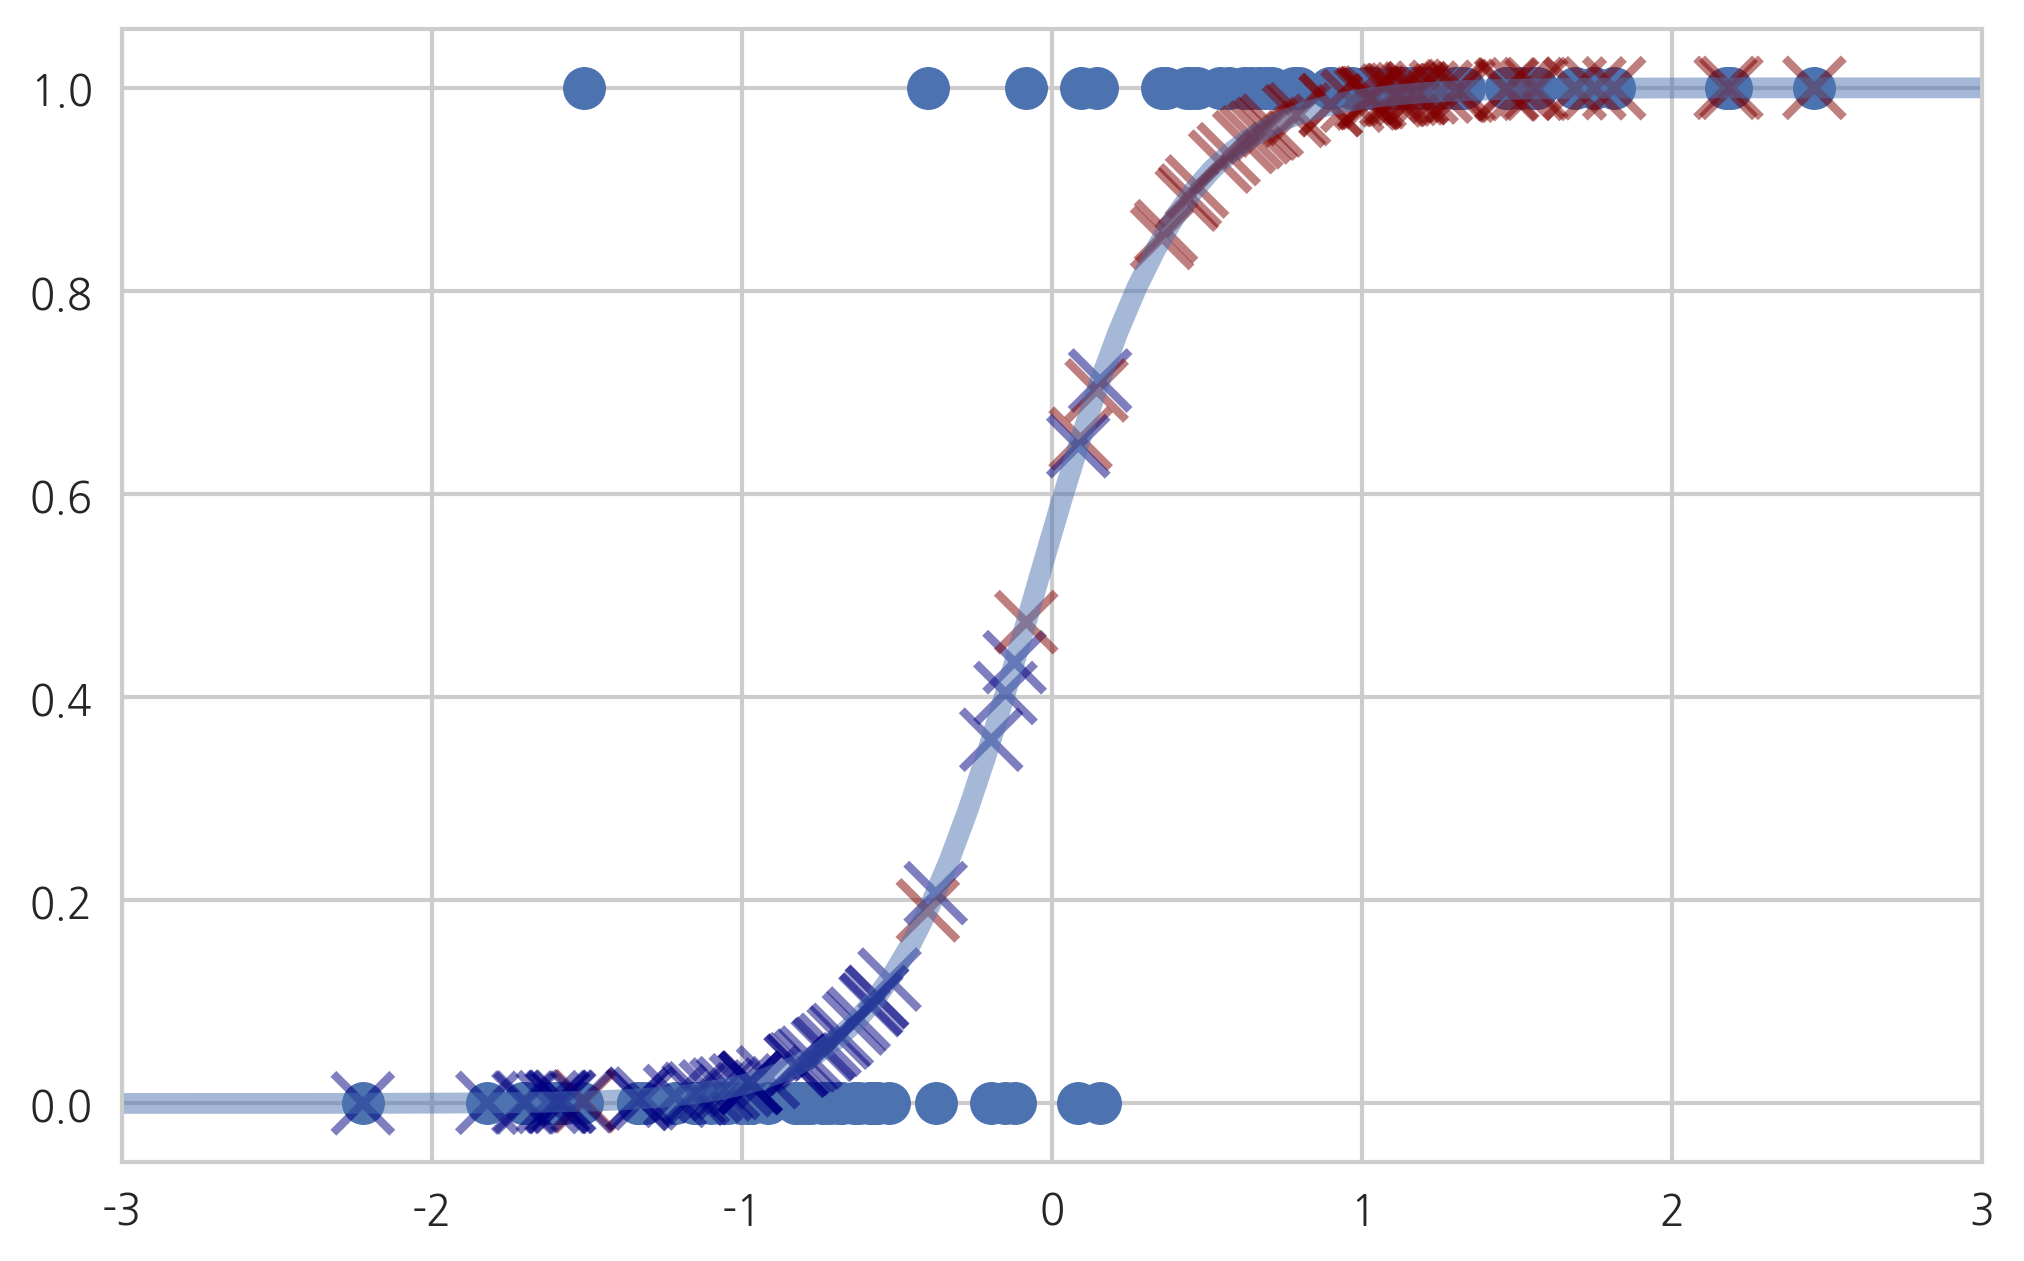

In [35]:
xx = np.linspace(-3, 3, 100)
sigmoid = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, sigmoid, lw=5, alpha=0.5)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, logit_res.predict(X), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

In [10]:
xxx = np.linspace(-3,3,100)
a=sm.add_constant(xxx)
logit_res.predict(a)

array([  3.86616110e-06,   4.99842983e-06,   6.46229989e-06,
         8.35488411e-06,   1.08017348e-05,   1.39651718e-05,
         1.80550481e-05,   2.33426682e-05,   3.01787795e-05,
         3.90168297e-05,   5.04430293e-05,   6.52152087e-05,
         8.43130379e-05,   1.09002927e-04,   1.40921883e-04,
         1.82185857e-04,   2.35529674e-04,   3.04487746e-04,
         3.93627323e-04,   5.08849461e-04,   6.57777095e-04,
         8.50255080e-04,   1.09899381e-03,   1.42039663e-03,
         1.83562157e-03,   2.37194102e-03,   3.06447756e-03,
         3.95841196e-03,   5.11177762e-03,   6.59897391e-03,
         8.51514477e-03,   1.09815711e-02,   1.41522049e-02,
         1.82214084e-02,   2.34328251e-02,   3.00890539e-02,
         3.85613639e-02,   4.92980073e-02,   6.28287015e-02,
         7.97615566e-02,   1.00767271e-01,   1.26544257e-01,
         1.57758362e-01,   1.94953411e-01,   2.38435393e-01,
         2.88144322e-01,   3.43541669e-01,   4.03551714e-01,
         4.66593595e-01,

## Scikit-Learn 패키지의 로지스틱 회귀

Scikit-Learn 패키지는 로지스틱 회귀 모형 `LogisticRegression` 를 제공한다. 

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X0, y)

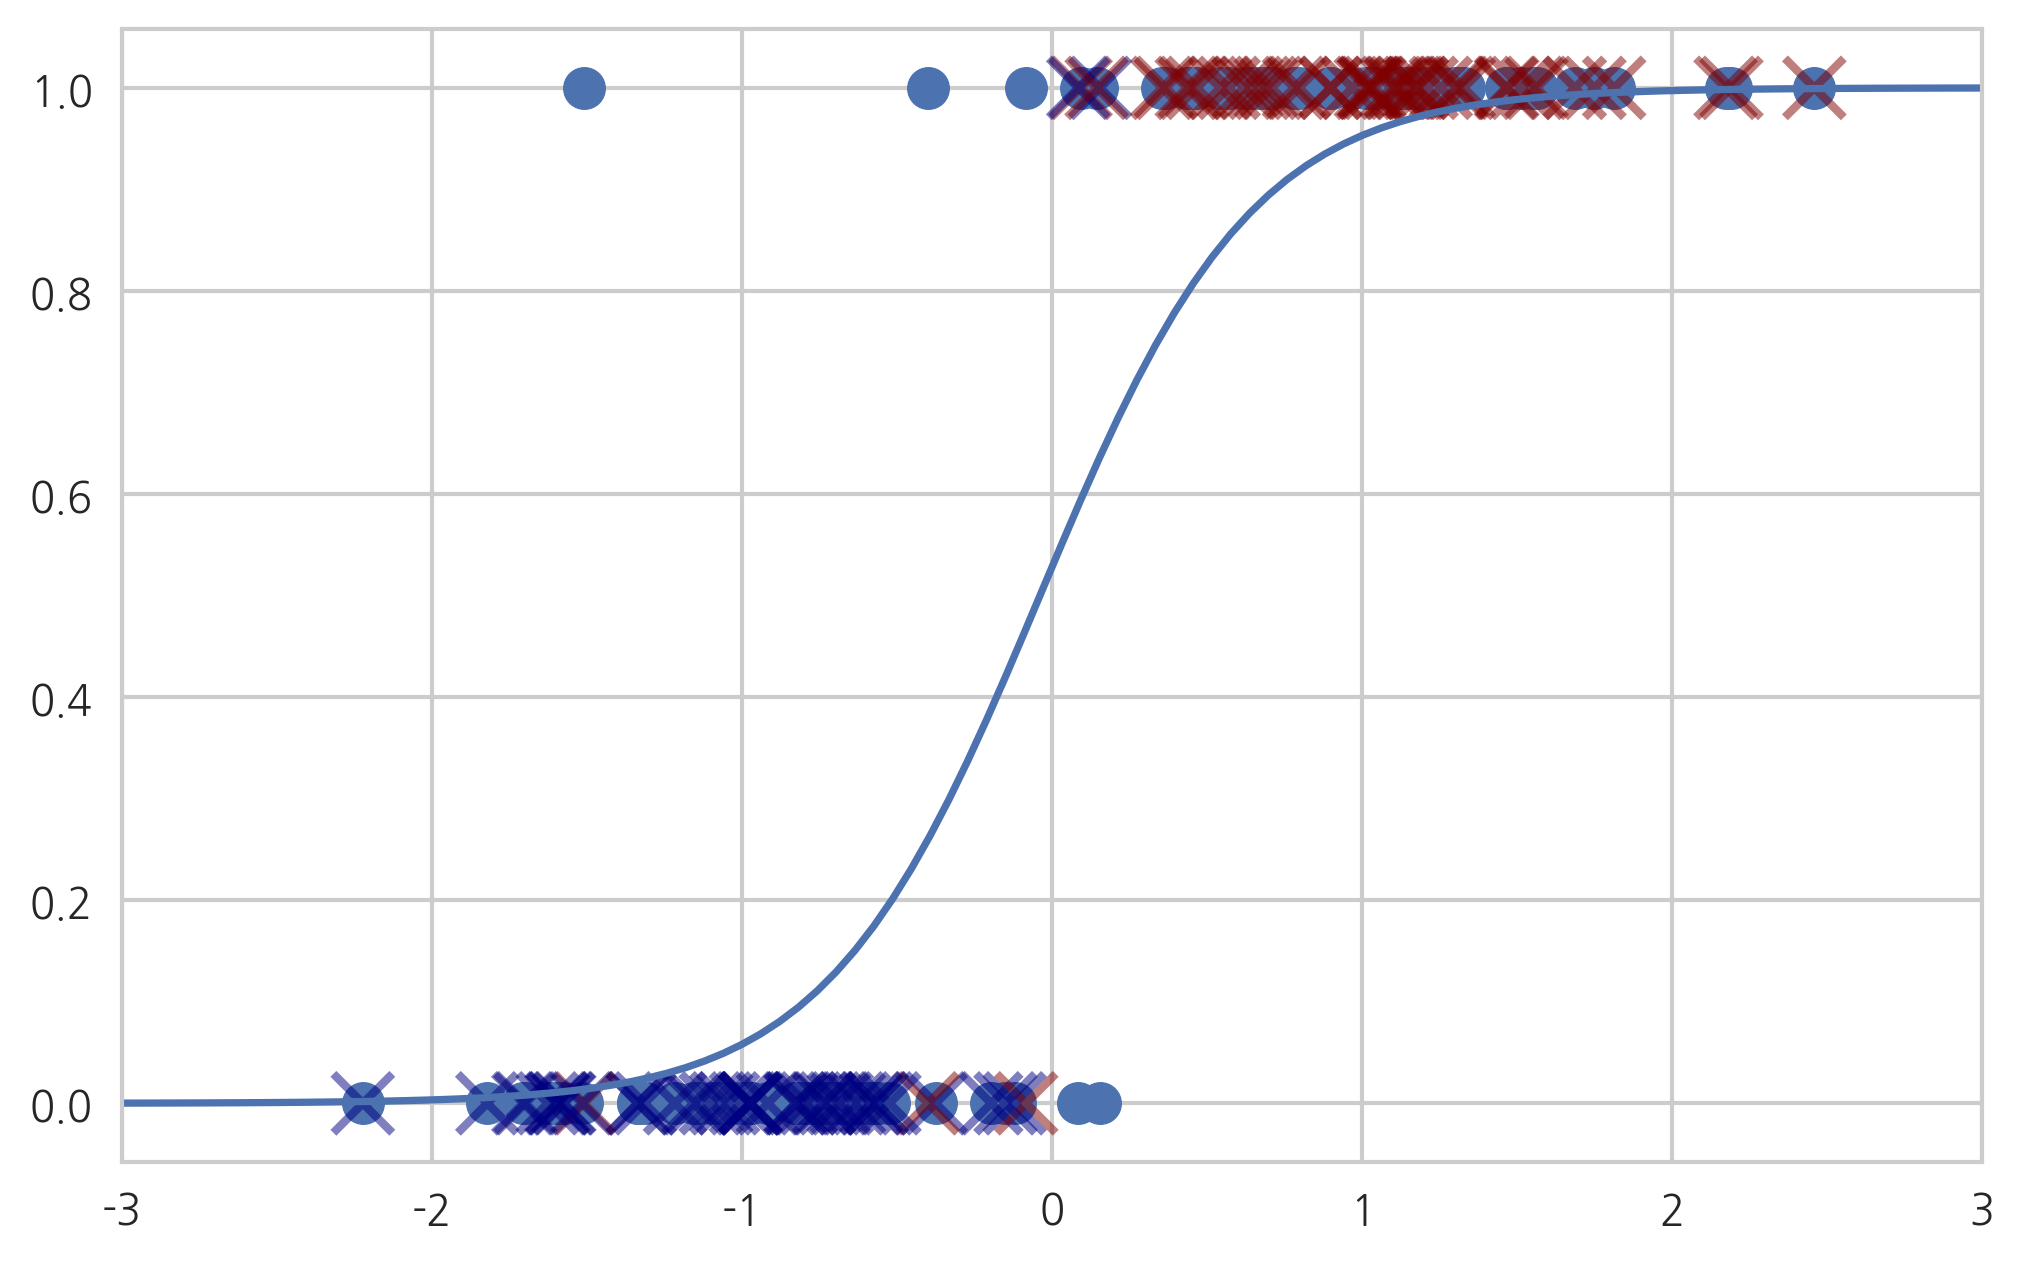

In [37]:
xx = np.linspace(-3, 3, 100)
sigm = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))
plt.plot(xx, sigm)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, model.predict(X0), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

## 예제 1: Michelin and Zagat 가이드 비교

다음 데이터는 뉴욕시의 레스토랑에 대한 두 개의 가이드북에서 발취한 것이다.

* Food: Zagat Survey 2006 의 고객 평가 점수
* InMichelin: 해당 고객 평가 점수를 받은 레스토랑 중 2006 Michelin Guide New York City 에 실린 레스토랑의 수
* NotInMichelin: 해당 고객 평가 점수를 받은 레스토랑 중 2006 Michelin Guide New York City 에 실리지 않은 레스토랑의 수
* mi: 해당 고객 평가 점수를 받은 레스토랑의 수
* proportion: 해당 고객 평가 점수를 받은 레스토랑 중 2006 Michelin Guide New York City 에 실린 레스토랑의 비율

In [17]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinFood.txt", sep="\t")
df.tail()

,Food,InMichelin,NotInMichelin,mi,proportion
9,24,6,1,7,0.86
10,25,11,1,12,0.92
11,26,1,1,2,0.50
12,27,6,1,7,0.86
13,28,4,0,4,1.00


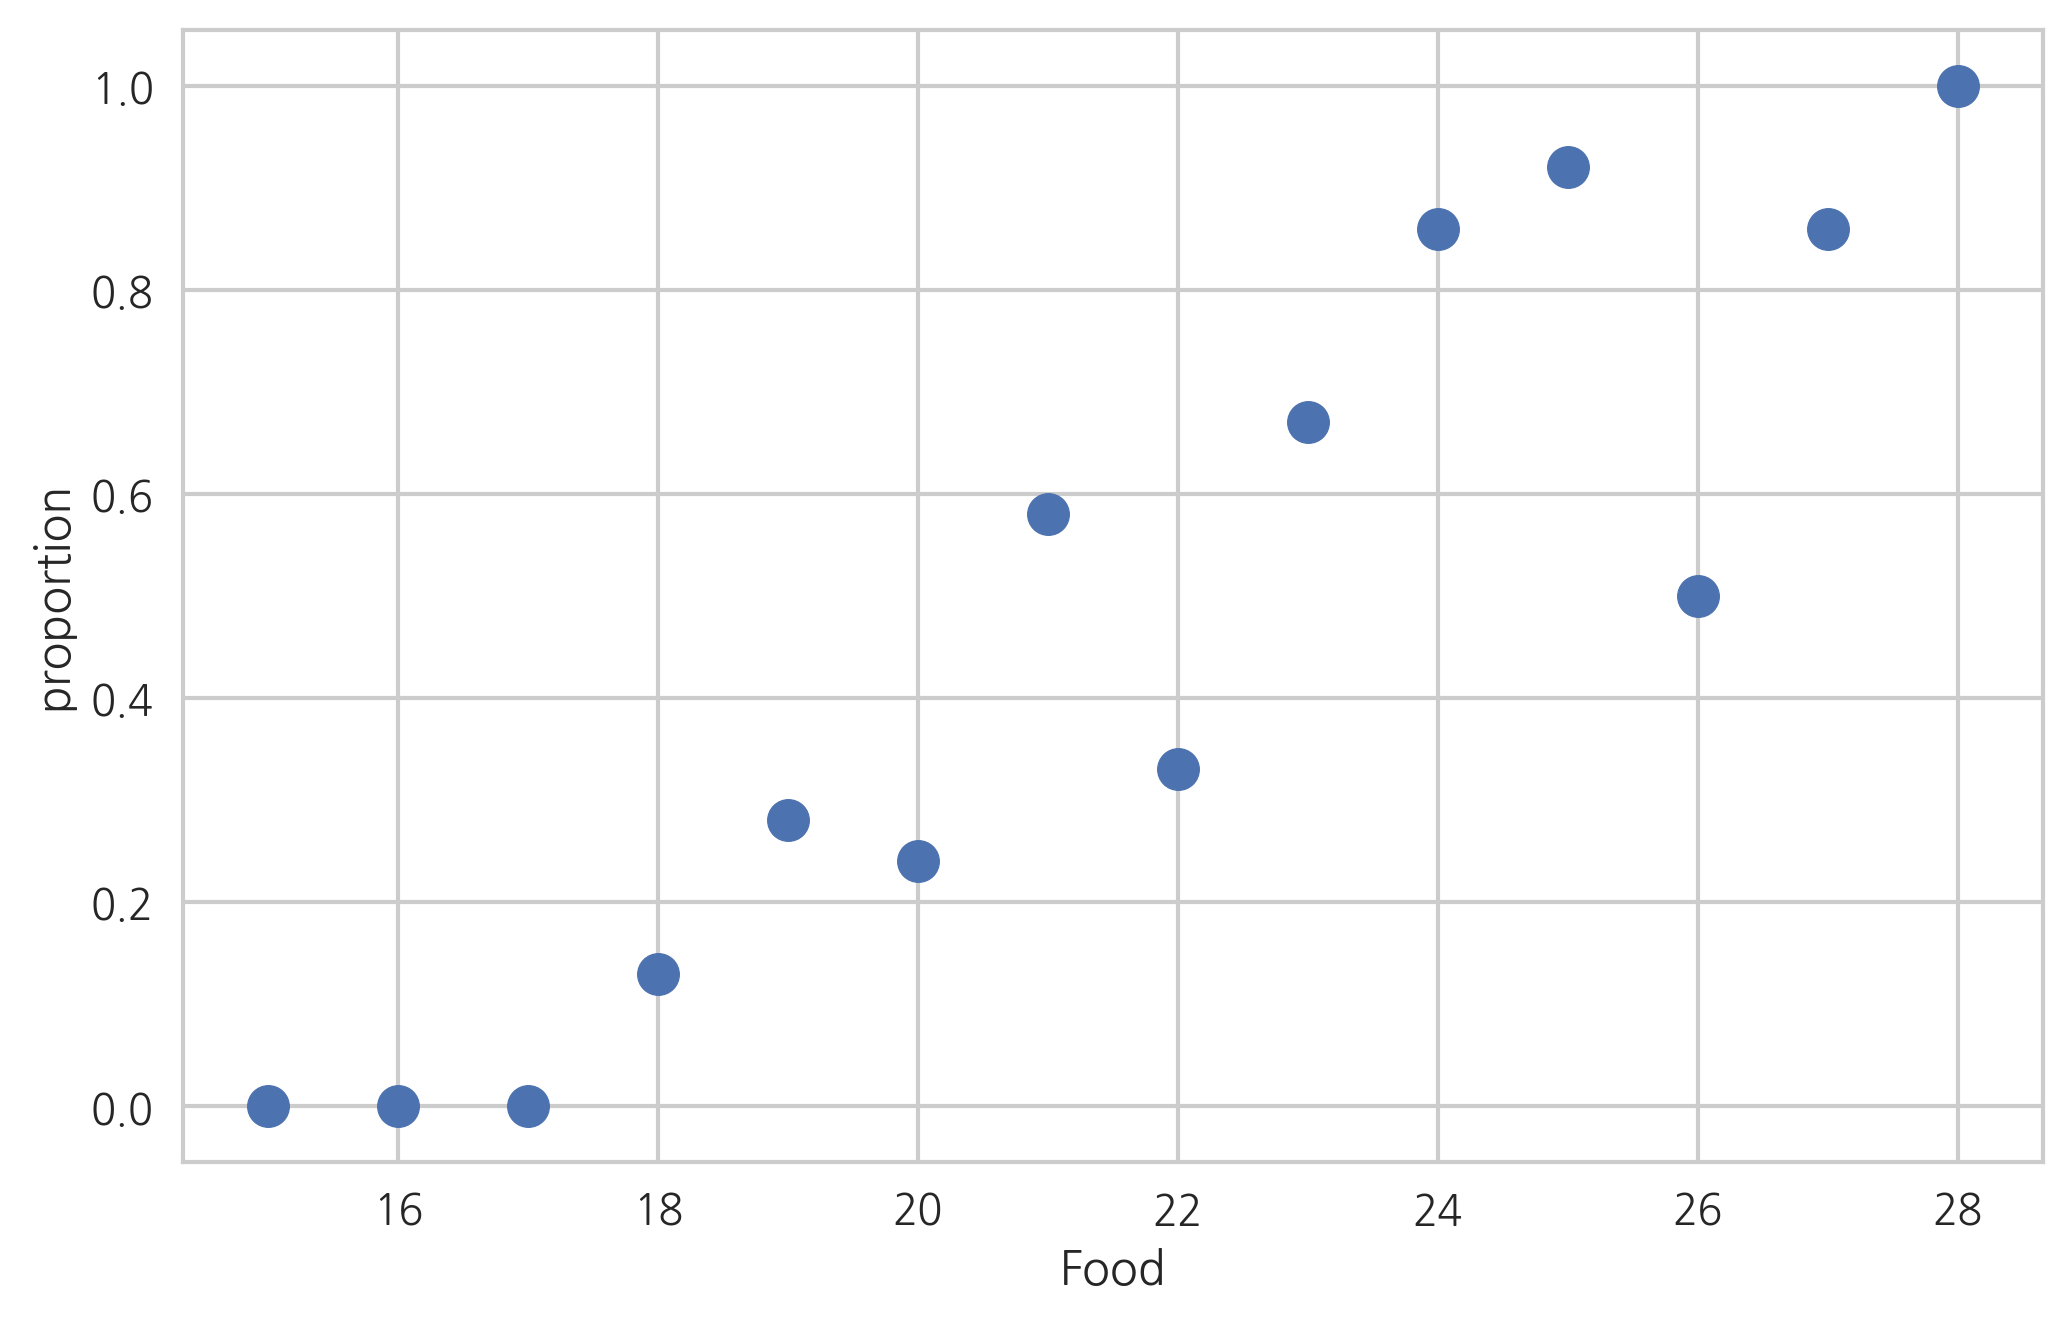

In [18]:
df.plot(kind="scatter", x="Food", y="proportion", s=100)
plt.show() ## y가 0~1 사이에 bound 가 되어있으므로 선형회귀가 아닌 로지스틱회귀분석을 써야함

In [19]:
X = sm.add_constant(df.Food)
y = df.proportion
model = sm.Logit(y, X)
result = model.fit()
print(result.summary()) ## 세타 값만 뽑아줌 

Optimization terminated successfully.
         Current function value: 0.355086
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             proportion   No. Observations:                   14
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            1
Date:                Thu, 26 Oct 2017   Pseudo R-squ.:                  0.4832
Time:                        16:17:51   Log-Likelihood:                -4.9712
converged:                       True   LL-Null:                       -9.6189
                                        LLR p-value:                  0.002297
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3600      5.211     -1.988      0.047     -20.574      -0.146
Food           0.4671      0.

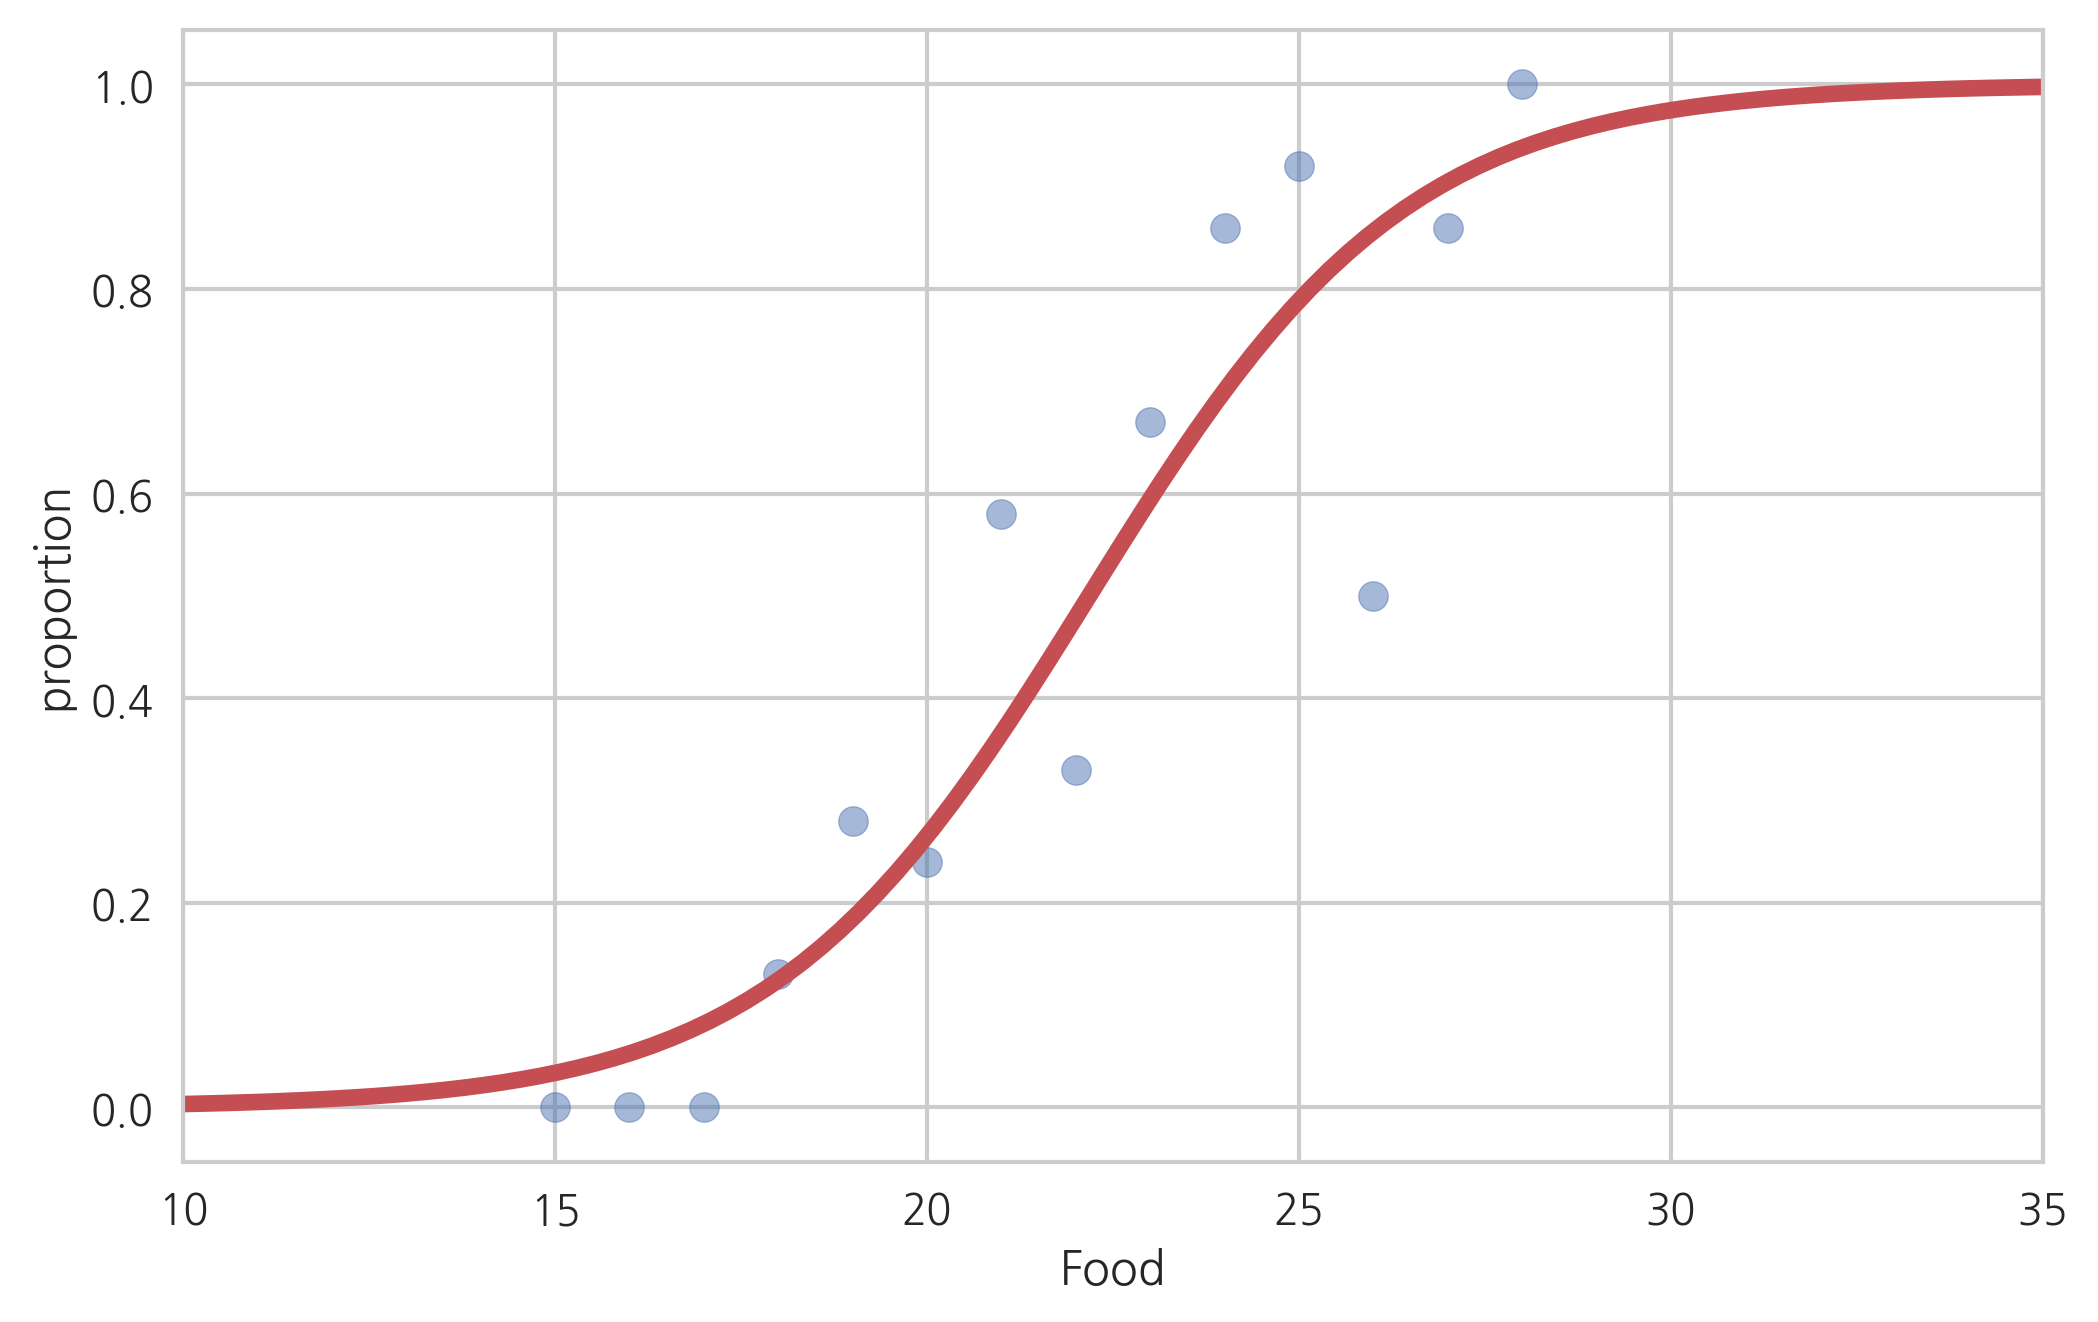

In [20]:
df.plot(kind="scatter", x="Food", y="proportion", s=50, alpha=0.5)
xx = np.linspace(10, 35, 100)
plt.plot(xx, result.predict(sm.add_constant(xx)), "r", lw=4)
plt.xlim(10, 35)
plt.show()

## 예제 2: Michelin 가이드 평점 예측

다음 데이터는 뉴욕시의 개별 레스토랑의 고객 평가 점수와 Michelin 가이드 수록 여부를 보인 것이다.


* InMichelin: Michelin 가이드 수록 여부
* Restaurant Name: 레스토랑 이름
* Food: 식사에 대한 고객 평가 점수 (1~30)
* Decor: 인테리어에 대한 고객 평가 점수 (1~30)
* Service: 서비스에 대한 고객 평가 점수 (1~30)
* Price: 저녁 식사 가격 (US$)


In [23]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinNY.csv", 
                 encoding="latin1")
df.tail()

,InMichelin,Restaurant Name,Food,Decor,Service,Price
159,0,Terrace in the Sky,23,25,21,62
160,1,Tocqueville,25,21,24,65
161,1,Triomphe,25,22,22,65
162,0,Village,20,20,19,40
163,1,Vong,23,24,21,60


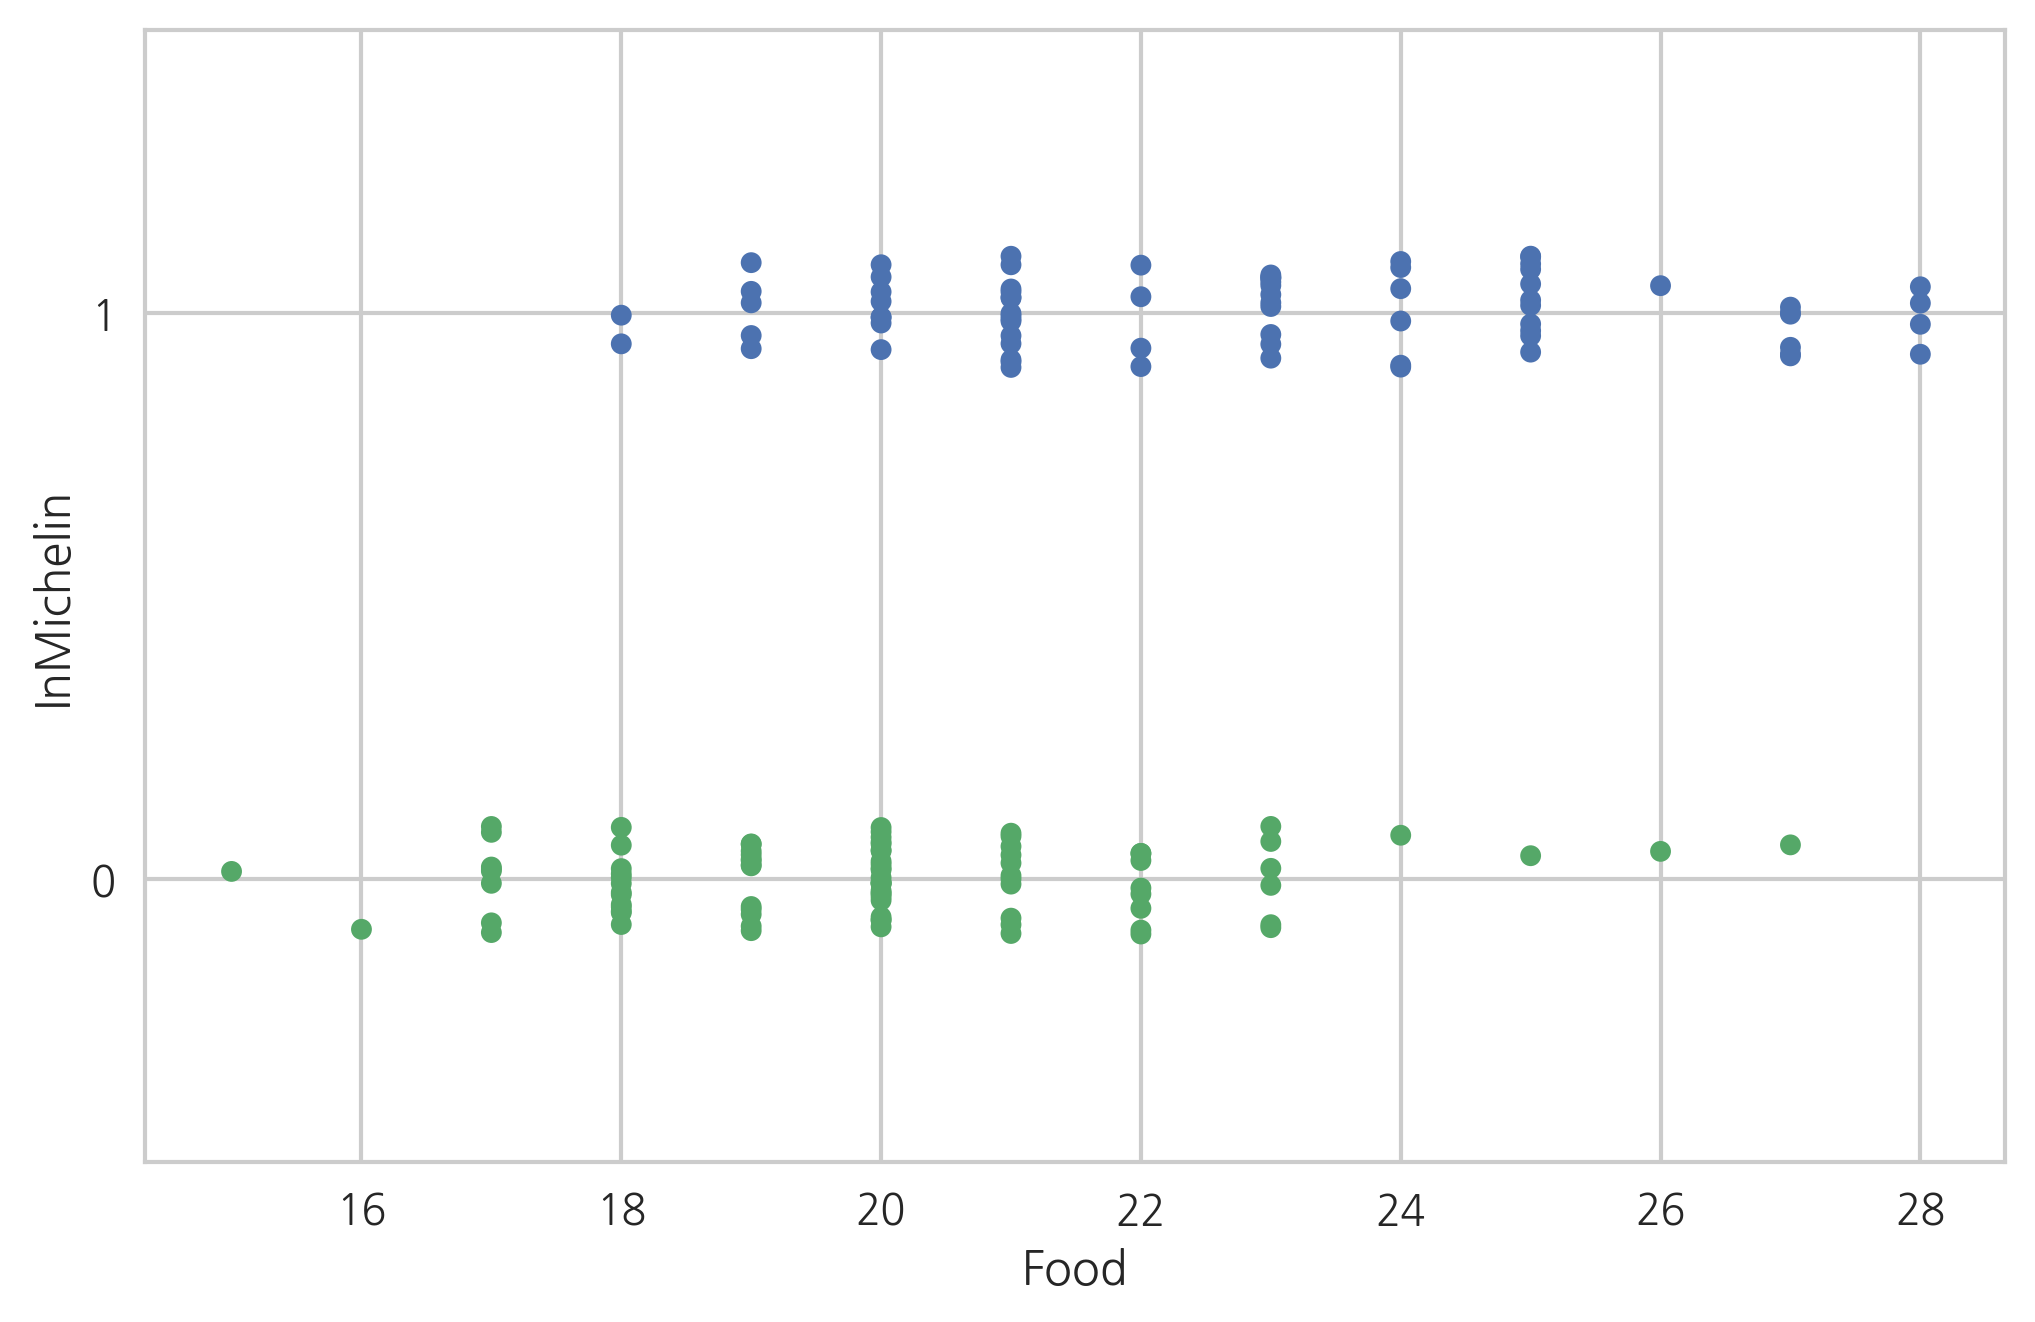

In [24]:
sns.stripplot(x="Food", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [25]:
model = sm.Logit.from_formula("InMichelin ~ Food + Decor + Service + Price", df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.452430
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             InMichelin   No. Observations:                  164
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                            4
Date:                Thu, 26 Oct 2017   Pseudo R-squ.:                  0.3428
Time:                        16:18:35   Log-Likelihood:                -74.198
converged:                       True   LL-Null:                       -112.89
                                        LLR p-value:                 6.213e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1975      2.309     -4.850      0.000     -15.723      -6.672
Food           0.4048      0.

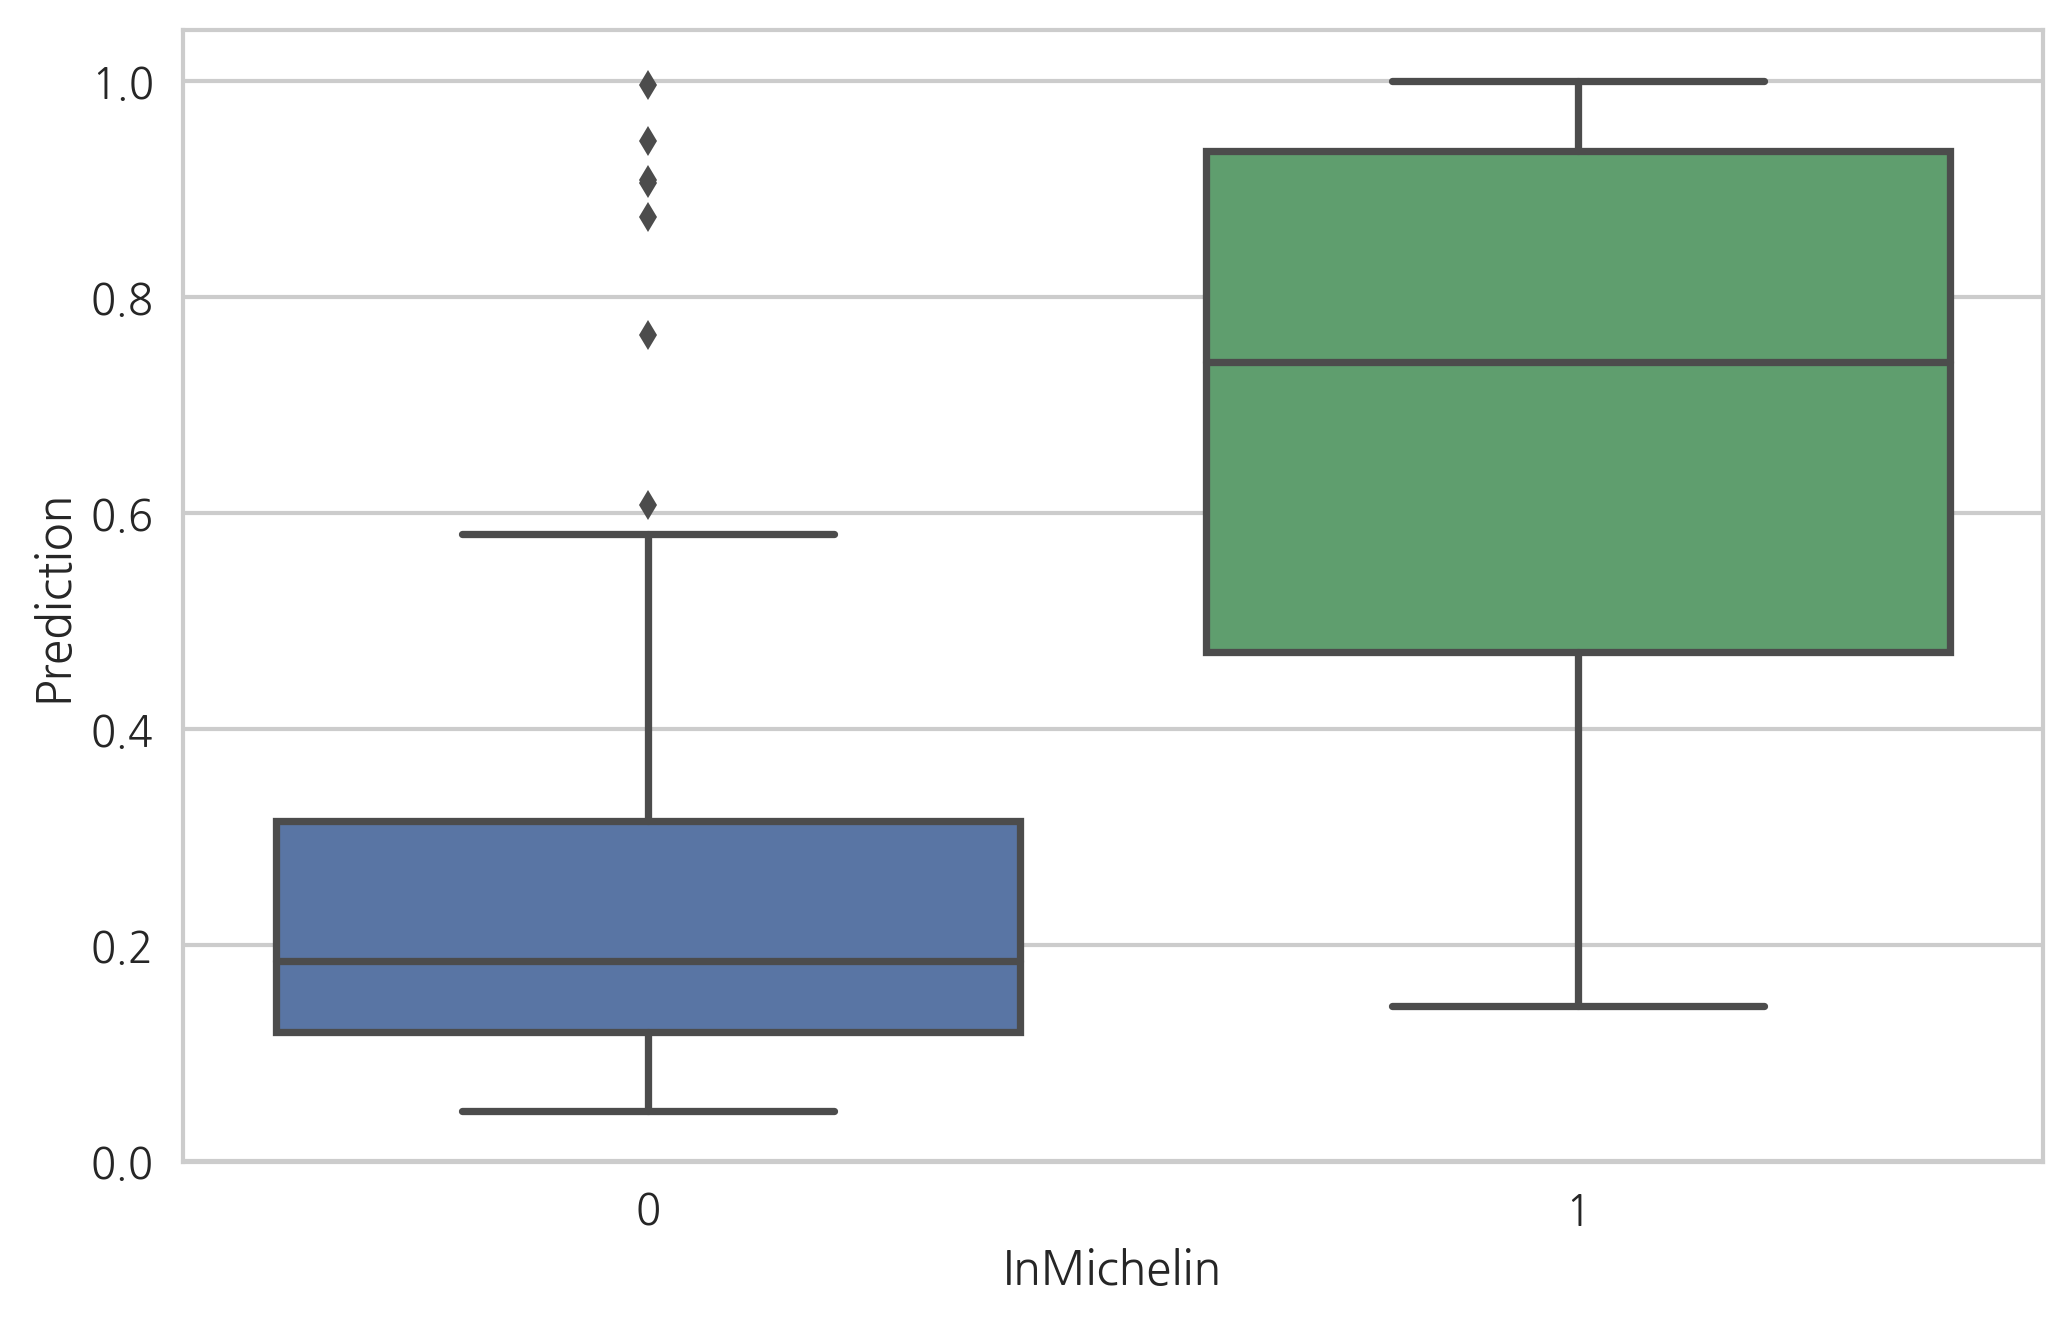

In [26]:
df["Prediction"] = result.predict(df)
sns.boxplot(x="InMichelin", y="Prediction", data=df)## 실제 종속변수 미슐렝 점수와 prediction 
plt.show()## 미슐렝 가이드에 속하지 않은 애들 0.5 이하 미술렝 가이드에 속한 애들은 0.7이상

## 예제 3: Fair's Affair Dataset

In [27]:
print(sm.datasets.fair.SOURCE)
print(sm.datasets.fair.NOTE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agr

In [28]:
df = sm.datasets.fair.load_pandas().data
df['BinaryAffairs'] = (df['affairs'] > 0).astype(float)
df.sample(5, random_state=1)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,BinaryAffairs
4269,3.0,27.0,9.0,1.0,3.0,12.0,5.0,4.0,0.000000,0.0
1147,2.0,27.0,6.0,1.0,2.0,12.0,2.0,2.0,0.583333,1.0
1683,4.0,37.0,13.0,3.0,1.0,12.0,4.0,4.0,0.615385,1.0
2992,4.0,27.0,2.5,1.0,2.0,12.0,3.0,5.0,0.000000,0.0
5114,3.0,37.0,16.5,2.0,3.0,14.0,3.0,3.0,0.000000,0.0


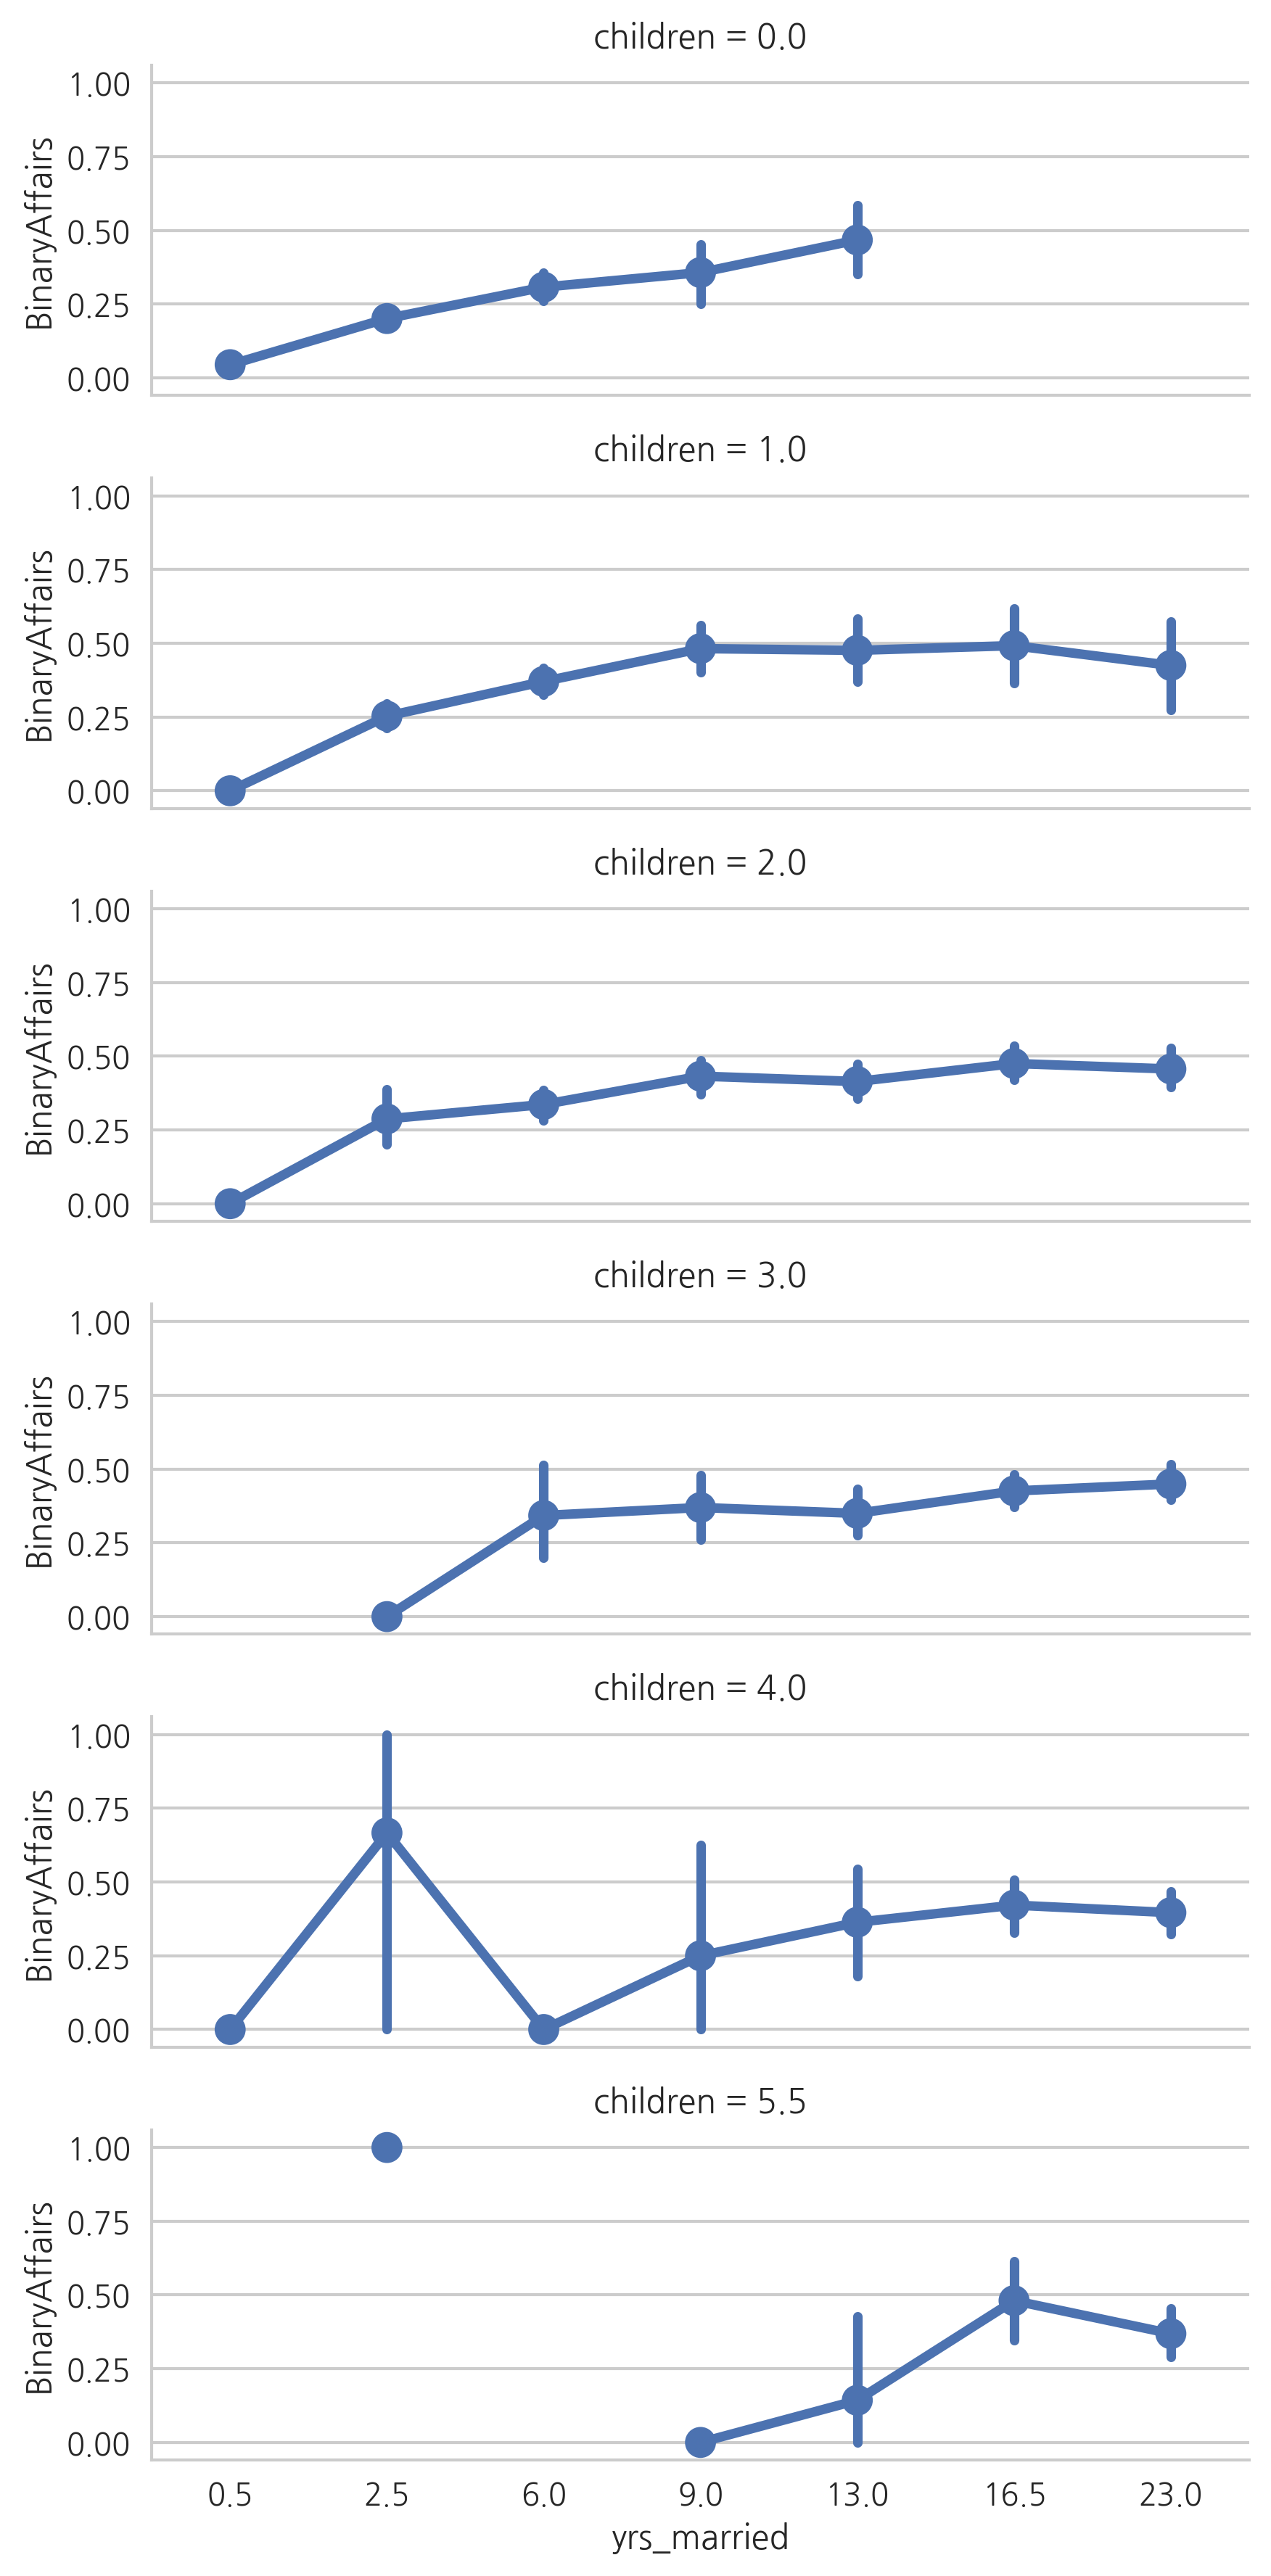

In [31]:
sns.factorplot(x="yrs_married", y="BinaryAffairs", row="children", data=df,
               orient="v", size=2, aspect=3, kind="point")
plt.show() ## x축:결혼 몇년? y축: 바람필확률 

In [32]:
modoel = smf.logit("BinaryAffairs ~ rate_marriage + religious + yrs_married + age + educ + children", df).fit()
print(modoel.summary())

Optimization terminated successfully.
         Current function value: 0.547174
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          BinaryAffairs   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6359
Method:                           MLE   Df Model:                            6
Date:                Thu, 26 Oct 2017   Pseudo R-squ.:                  0.1297
Time:                        16:19:49   Log-Likelihood:                -3483.3
converged:                       True   LL-Null:                       -4002.5
                                        LLR p-value:                4.345e-221
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.8350      0.296     12.940      0.000       3.254       4.416
rate_marriage    -0.